<h1>Runkeeper Analyzer</h1>
<p> I am learning data analysis and love running, so I put the two together. Please fell free to comment and make suggestions </p>

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.dates as mdates
from scipy import stats
from datetime import datetime as dt
%matplotlib inline 

In [2]:
#Load data 
data = '/home/camila/Desktop/runkeeper-data-export-26662480-2017-08-15-1401/cardioActivities.csv'

df_runkeeper = pd.read_csv(data)

print(df_runkeeper.head())

                  Date     Type Route Name  Distance (km) Duration  \
0  2017-08-10 17:59:54  Running        NaN           3.00    18:51   
1  2017-08-08 18:44:31  Running        NaN           6.94    45:23   
2  2017-07-28 12:40:04  Running        NaN           7.86    53:12   
3  2017-07-24 20:24:47  Running        NaN           6.09    45:33   
4  2017-07-21 21:43:10  Running        NaN           5.23    32:13   

  Average Pace  Average Speed (km/h)  Calories Burned  Climb (m)  \
0         6:18                  9.54            162.0         21   
1         6:32                  9.17            376.0         62   
2         6:46                  8.86            417.0         65   
3         7:29                  8.02            318.0         69   
4         6:10                  9.73            289.0         71   

   Average Heart Rate (bpm) Notes             GPX File  
0                       NaN   NaN  2017-08-10-1759.gpx  
1                       NaN   NaN  2017-08-08-1844.gpx  

In [3]:
#Check if any data is missing
print(df_runkeeper.isnull().sum())

Date                          0
Type                          0
Route Name                  316
Distance (km)                 0
Duration                      0
Average Pace                 18
Average Speed (km/h)         18
Calories Burned               0
Climb (m)                     0
Average Heart Rate (bpm)    319
Notes                       309
GPX File                     54
dtype: int64


In [4]:
#Now, check if any data is duplicated ---> have to work on this
print(df_runkeeper.duplicated().any())

True


In [5]:
#Activities types
print(df_runkeeper['Type'].value_counts().reset_index())

                     index  Type
0                  Running   262
1                  Cycling    34
2        Strength Training    13
3                  Walking     6
4                  Skating     2
5                 Swimming     2
6                   Rowing     2
7          Downhill Skiing     1
8                 Spinning     1
9   Stairmaster / Stepwell     1
10              Elliptical     1


In [6]:
#Split the table, only running:
running = df_runkeeper.loc[df_runkeeper['Type'] == 'Running']

In [7]:
#Drop not useful columns:
running = running.drop(['Route Name','Notes'] , 1)

In [8]:
#Parse date:
def parse_date(date):
    date = str(date)
    if date == '':
        return None
    else:
        return dt.strptime(date,'%Y-%m-%d %H:%M:%S')
    
#running['parsed_date'] = running["Date"].apply(parse_date)
#running.loc[:,'parsed_date'] = running["Date"].apply(parse_date)
running = running.assign(parsed_date = running["Date"].apply(parse_date))
#running = running.join(running['parsed_date'])

In [9]:
#Parse pace
def convert2pace(speed):
    pace = 60/speed
    return pace

running["Average Pace"] = running["Average Speed (km/h)"].apply(convert2pace)

In [10]:
#Drop speed outliers
running = running[np.abs(running['Average Speed (km/h)']-running['Average Speed (km/h)'].mean())<=(3*running['Average Speed (km/h)'].std())] 

In [12]:
#DF describe
running.describe()

,Distance (km),Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm)
count,259.000000,259.000000,259.000000,259.000000,259.000000,5.000000
mean,4.707143,7.107406,8.807027,243.675263,47.787645,141.600000
std,2.930982,1.660641,1.656156,157.372611,49.851225,22.995652
min,0.220000,4.421518,3.750000,13.000000,0.000000,101.000000
25%,2.675000,6.060606,7.790000,138.000000,11.500000,147.000000
50%,4.470000,6.703911,8.950000,221.967186,36.000000,150.000000
75%,5.685000,7.702182,9.900000,294.500000,70.000000,153.000000
max,21.100000,16.000000,13.570000,1186.000000,328.000000,157.000000


In [13]:
# Variables:
oldest = min(running["parsed_date"])
most_recent = max(running["parsed_date"])
delta_time = most_recent - oldest
days_over_time = delta_time / np.timedelta64(1, 'D')
years_over_time =  int(days_over_time/365)
months = int((days_over_time % 365)/30)
total_distance = running["Distance (km)"].sum()
year_avg = total_distance/years_over_time
mean_distance = running["Distance (km)"].mean()
max_distance =  running["Distance (km)"].max()
min_distance =  running["Distance (km)"].min()
total_calories = running["Calories Burned"].sum()
total_activities = running["Date"].count()
avg_calories = total_calories/total_activities
avg_pace = running["Average Pace"].mean()
avg_speed = running["Average Speed (km/h)"].mean()
total_climb = running["Climb (m)"].sum()
avg_heart_rate = (running["Average Heart Rate (bpm)"].sum())/ (running["Average Heart Rate (bpm)"].count())
avg_climb = total_climb/total_activities

In [14]:
# Description:
str_total_run1 = "In total I ran " + str(total_activities) + " times over aprox " + str(years_over_time) + " years and " + str(months) + " months (" + str(int(days_over_time)) + " days) covering a total distance of 1223.93 km."
str_total_run2 =  "\nI usually run {0:.1f}".format(mean_distance) + "km each activity." + "\nThe max. distance I ran was " + str(max_distance) + "km and the min distance was " + str(min_distance) + "km."
str_total_run3 = "\nDuring all this running I burnt a total of {0:.1f}".format(total_calories)+ " calories. Average of {0:.1f}".format(avg_calories) + " calories per activity."
str_total_run4 =  "\nMy average pace is {0:.1f}".format(avg_pace) + " min/km and therefore my average speed is {0:.1f}".format(avg_speed) + " km/h."
str_total_run5 = "\nTotal climb was " + str(total_climb) + " meters and the average climb per activitiy was {0:.1f}".format(avg_climb) + " meters."
str_total_run6 = "\nLast but not least, average heart rate was {0:.1f}".format(avg_heart_rate) + " bpm."
overview_report = str_total_run1 + str_total_run2 + str_total_run3 + str_total_run4 + str_total_run5 + str_total_run6
print(overview_report )

In total I ran 259 times over aprox 3 years and 8 months (1351 days) covering a total distance of 1223.93 km.
I usually run 4.7km each activity.
The max. distance I ran was 21.1km and the min distance was 0.22km.
During all this running I burnt a total of 63111.9 calories. Average of 243.7 calories per activity.
My average pace is 7.1 min/km and therefore my average speed is 8.8 km/h.
Total climb was 12377 meters and the average climb per activitiy was 47.8 meters.
Last but not least, average heart rate was 141.6 bpm.


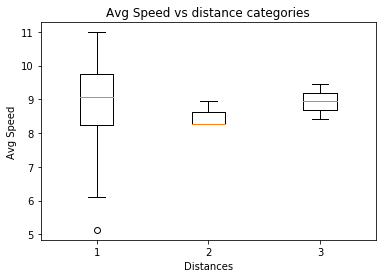

In [15]:
#Compare average speed ---> ticks labels
around5k = running[(running["Distance (km)"] >= 4.5) & (running["Distance (km)"] <= 5.5)]
around10k = running[(running["Distance (km)"] >= 9.5) & (running["Distance (km)"] <= 10.5)]
around21k = running[(running["Distance (km)"] >= 20) & (running["Distance (km)"] <= 21.5)]
data = (around5k['Average Speed (km/h)'], around10k['Average Speed (km/h)'], around21k['Average Speed (km/h)'])

fig = plt.figure()

ax = fig.add_subplot(111)
ax.boxplot(data)

ax.set_xlabel('Distances')
ax.set_ylabel('Avg Speed')
ax.set_title('Avg Speed vs distance categories')
ax.set_xticks = ['1','2','3']
# ax.set_xticklabels = ["5K", "10K", "21K"] ---> does not work
plt.show()

<p> It certainly looks like I can improve my 10k pace.</p>

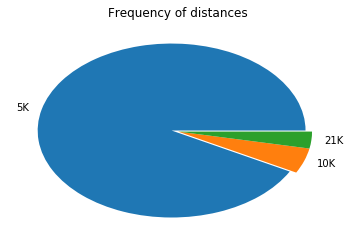

In [16]:
#Compare number of activities per category
activities5k = around5k["parsed_date"].count()
activities10k = around10k["parsed_date"].count()
activities21k = around21k["parsed_date"].count()

data_activities = [activities5k, activities10k, activities21k]
pie_labels = ["5K", "10K", "21K"]

explode = (0.05, 0, 0)

plt.pie(data_activities, explode=explode, labels=pie_labels)
plt.title('Frequency of distances')

plt.show()

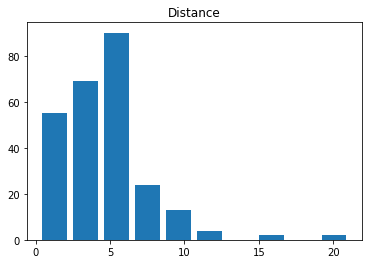

In [17]:
#Distance histogram 
hist, bins = np.histogram(running["Distance (km)"], bins=10)
width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Distance")
plt.show()

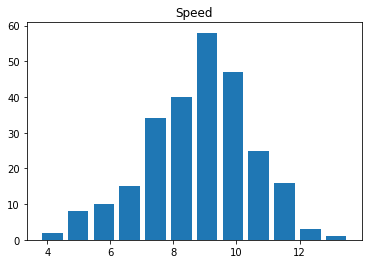

In [18]:
#Speed histogram 
hist, bins = np.histogram(running["Average Speed (km/h)"], bins= 12)
width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Speed")
plt.show()

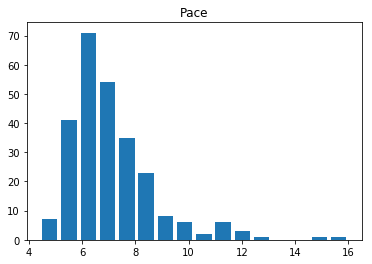

In [19]:
#Pace histogram 
hist, bins = np.histogram(running["Average Pace"], bins=16)
width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Pace")
plt.show()

In [20]:
# Creates function to create labels:
def stringer(series):
    list = []
    for elem in series: 
        list.append(str(elem))
    return list

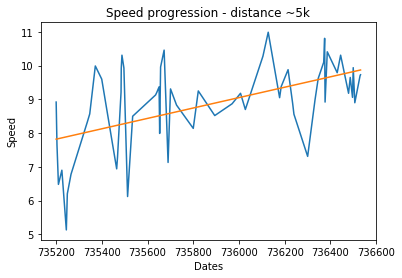

In [23]:
# Speed progression - distance ~5k

fig, ax = plt.subplots()

dates = around5k["parsed_date"]

my_labels = stringer(around5k["parsed_date"])

y = around5k["Average Speed (km/h)"]
x = mdates.date2num(dates.astype(dt))

m, b = np.polyfit(x, y, 1)

dates_labels = dates
ax.plot(x,y)
ax.plot(x, m*x + b)
ax.set_title("Speed progression - distance ~5k")
ax.set_ylabel('Speed')
ax.set_xlabel('Dates')
#ax.set_xticklabels(x, my_labels, rotation = 'vertical') ---> does not work?

plt.show()

In [31]:
#Predicting speed goal achievement

y = around5k["Average Speed (km/h)"]
x = mdates.date2num(dates.astype(dt))

m, b = np.polyfit(x, y, 1)

#predicted_speed = m*x + b
x = (11 - b)/m

print(mdates.num2date(x))


2019-07-24 19:35:38.892509+00:00


<h3> Final considerations:</h3>
<p> I certainly can improve my 10k pace. And though I know progress is not a linear function, I am really optimistic with the prediction.</p>